In [0]:
import pandas as pd
import lxml as lxml
import numpy as np
import html5lib as ht
from pandas.io.html import read_html
import matplotlib.pyplot as plt
import xlsxwriter
import xlrd, xlwt

In [0]:
pl1 = 'https://www.moneycontrol.com/financials/marutisuzukiindia/results/yearly/MS24#MS24'
pl2 = pl1.replace('#','/2#')
pl3 = pl1.replace('#','/3#')
bl1 = pl1.replace('results/yearly','balance-sheetVI')
bl2 = bl1.replace('#','/2#')
bl3 = bl1.replace('#','/3#')

In [0]:
p1 = pd.read_html(pl1,index_col=0,header=0)[0]
p2 = pd.read_html(pl2,index_col=0,header=0)[0]
p3 = pd.read_html(pl3,index_col=0,header=0)[0]

In [0]:
b1 = pd.read_html(bl1,index_col=0,header=0)[0]
b2 = pd.read_html(bl2,index_col=0,header=0)[0]
b3 = pd.read_html(bl3,index_col=0,header=0)[0]

In [0]:
index = p1.index.name
index2 = b1.index.name

In [0]:
p = p1.merge(p2, on = index).merge(p3, on = index)
b = b1.merge(b2, on = index2).merge(b3, on = index2)

In [0]:
p = p[:25]
b=b[:42]
b = b.drop([b1.index[0]])
p.columns = b.columns
f = p.append(b)

In [0]:
f =f.replace("--",0)
f = f.sort_index(axis=1 ,ascending=True)
f = f.drop(f.columns[[-3,-2,-1]], axis = 1)
f = f.apply(pd.to_numeric) 

In [9]:
corr = f.T.corr()
r =  corr.iat[1,1]
corr = corr.replace(to_replace = r, value = int(.001))
max_corrwith  = corr.idxmax(axis=1)
print(corr.to_string())

                                                  Net Sales/Income from operations  Other Operating Income  Total Income From Operations  EXPENDITURE  Consumption of Raw Materials  Purchase of Traded Goods  Increase/Decrease in Stocks  Power & Fuel  Employees Cost  Depreciation  Excise Duty  Admin. And Selling Expenses  R & D Expenses  Provisions And Contingencies  Exp. Capitalised  Other Expenses  P/L Before Other Inc. , Int., Excpt. Items & Tax  Other Income  P/L Before Int., Excpt. Items & Tax  Interest  P/L Before Exceptional Items & Tax  Exceptional Items  P/L Before Tax       Tax  P/L After Tax from Ordinary Activities  EQUITIES AND LIABILITIES  SHAREHOLDER'S FUNDS  Equity Share Capital  Total Share Capital  Reserves and Surplus  Total Reserves and Surplus  Total Shareholders Funds  NON-CURRENT LIABILITIES  Long Term Borrowings  Deferred Tax Liabilities [Net]  Other Long Term Liabilities  Long Term Provisions  Total Non-Current Liabilities  CURRENT LIABILITIES  Short Term Borrowi

In [10]:
YoY = (f/f.shift(periods=1, axis='columns'))-1
YoY = YoY.fillna(0)
i = YoY.iat[2,2]
YoY = YoY.replace(i,0)
print(YoY.to_string())

                                                  Mar 05    Mar 06     Mar 07     Mar 08    Mar 09    Mar 10     Mar 11     Mar 12     Mar 13    Mar 14     Mar 15     Mar 16     Mar 17    Mar 18    Mar 19
Net Sales/Income from operations                     0.0  0.105676   0.166255   0.038034  0.167536  0.420596   0.225390  -0.043908   0.227819  0.000756   0.139777   0.161209   0.185471  0.167322  0.063014
Other Operating Income                               0.0  0.000000   0.000000   0.000000  0.000000  0.000000   0.000000   0.190248   0.106866  0.082533   0.292877  -0.196475   0.025982  0.473165  0.805778
Total Income From Operations                         0.0  0.000000   0.000000   0.038034  0.167536  0.420596   0.250382  -0.039228   0.224824  0.002586   0.143476   0.151438   0.182430  0.172381  0.078453
EXPENDITURE                                          0.0  0.000000   0.000000   0.000000  0.000000  0.000000   0.000000   0.000000   0.000000  0.000000   0.000000   0.000000   0.00

In [11]:
fi = f.copy()
fi['mean']= YoY.mean(axis=0)
fi['std']=YoY.std(axis=0)
fi['max_corrwith']=max_corrwith
fi['max_corrvalur']=corr.max(axis=1)
N = fi.iat[3,0]
fi =fi.replace(N,"")
print(fi.to_string())

                                                   Mar 05   Mar 06   Mar 07   Mar 08   Mar 09   Mar 10   Mar 11   Mar 12   Mar 13   Mar 14   Mar 15   Mar 16   Mar 17   Mar 18   Mar 19 mean std                         max_corrwith max_corrvalur
Net Sales/Income from operations                  13343.1  14753.1  17205.9  17860.3  20852.5    29623  36299.7  34705.9  42612.6  42644.8  48605.5  56441.2  66909.4  78104.8  83026.5                      Total Shareholders Funds      0.993584
Other Operating Income                                  0        0        0        0        0        0   740.35    881.2   975.37  1055.87  1365.11   1096.9   1125.4   1657.9   2993.8                             Trade Receivables      0.924891
Total Income From Operations                            0        0  17205.9  17860.3  20852.5    29623  37040.1  35587.1  43587.9  43700.6  49970.6  57538.1  68034.8  79762.7  86020.3                                Other Expenses      0.986209
EXPENDITURE             

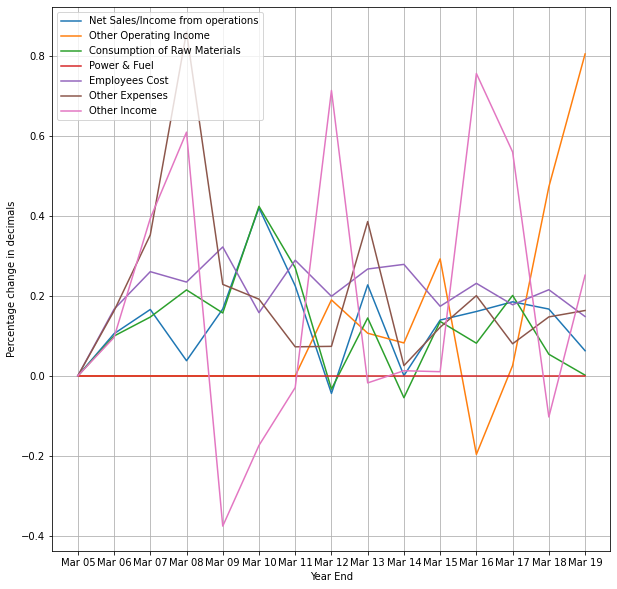

In [12]:
plt.figure(figsize = (10,10))

list = YoY.iloc[[0,1,4,7,8,15,17]].index.tolist()
for v in list:
  plt.plot(YoY.T.index, YoY.T[v],label = v )
plt.legend()
plt.xlabel('Year End')
plt.ylabel('Percentage change in decimals')
plt.savefig('YoY P&l change %.png')
plt.grid()

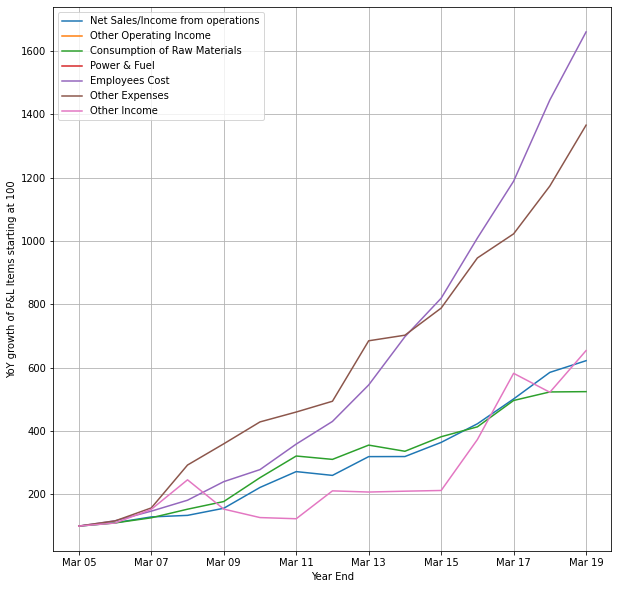

In [13]:
import pylab
plt.figure(figsize = (10,10))

list = f.iloc[[0,1,4,7,8,15,17]].index.tolist()
for v in list:
  ((f.T[v])/(f.T[v]).iloc[0]*100).plot(kind = 'line')
plt.legend()
plt.xlabel('Year End')
plt.ylabel('YoY growth of P&L Items starting at 100')
plt.savefig('YoY P&l change.png')
plt.grid()

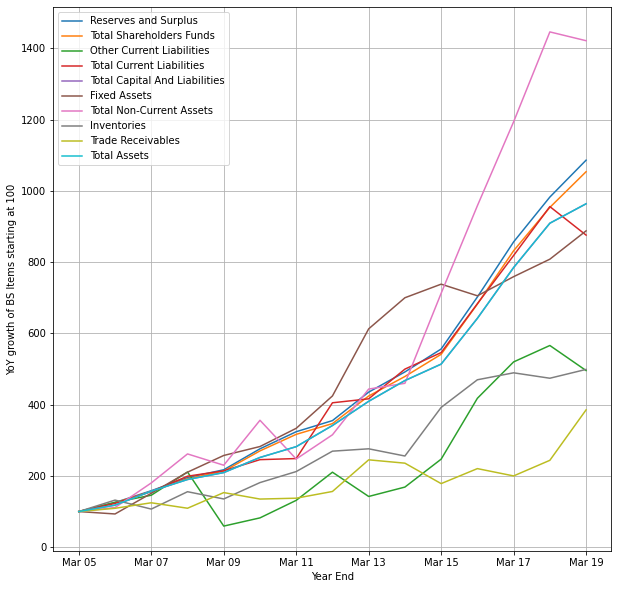

In [14]:
import pylab
plt.figure(figsize = (10,10))

list = f.iloc[[29,31,41,43,44,51,56,59,60,65]].index.tolist()
for v in list:
  ((f.T[v])/(f.T[v]).iloc[0]*100).plot(kind = 'line')
plt.legend()
plt.xlabel('Year End')
plt.ylabel('YoY growth of BS Items starting at 100')
plt.savefig('YoY BS change.png')
plt.grid()

In [0]:
a = pd.DataFrame(f["Mar 19"])
a['Mar 20']= a['Mar 19']*(YoY["Mar 10"]+1)
a['Mar 21']= a['Mar 20']*(YoY["Mar 11"]+1)
a['Mar 22']= a['Mar 21']*(YoY["Mar 12"]+1)
a['Mar 23']= a['Mar 22']*(YoY["Mar 13"]+1)
a['Mar 24']= a['Mar 23']*(YoY["Mar 14"]+1)
a['Mar 25']= a['Mar 24']*(YoY["Mar 15"]+1)
a['Mar 26']= a['Mar 25']*(YoY["Mar 16"]+1)
a['Mar 27']= a['Mar 26']*(YoY["Mar 17"]+1)
a['Mar 28']= a['Mar 27']*(YoY["Mar 18"]+1)
a['Mar 29']= a['Mar 28']*(YoY["Mar 19"]+1)

In [0]:
a=a.T
a['Total Income']=a.iloc[:, 0:2].sum(axis=1)
a['Expenses Total']= a.iloc[:, 4:16].sum(axis=1)

In [0]:
a['Profit before tax']= a['Total Income']+a['Other Income']+a['Interest']-a['Expenses Total']

In [0]:
Tax_rate = .25

In [0]:
a['Profit after tax']= a['Profit before tax']*(1-Tax_rate)

In [0]:
a['FCFF']= a['Profit after tax']+a['Depreciation']

In [21]:
a=a.T
print(a.to_string())

                                                   Mar 19         Mar 20         Mar 21         Mar 22         Mar 23         Mar 24         Mar 25         Mar 26         Mar 27         Mar 28         Mar 29
Net Sales/Income from operations                  83026.5  117947.127722  144531.229948  138185.148658  169666.386261  169794.593945  193528.026183  224726.569825  266406.808343  310982.470090  330578.735915
Other Operating Income                             2993.8    2993.800000    2993.800000    3563.364031    3944.165200    4269.688129    5520.181425    4435.603728    4550.850976    6704.154819   12106.217924
Total Income From Operations                      86020.3  122200.108529  152796.863584  146802.983904  179807.851280  180272.758534  206137.648783  237354.747696  280655.475043  329035.118192  354848.815016
EXPENDITURE                                           NaN            NaN            NaN            NaN            NaN            NaN            NaN            NaN      

In [0]:
writer = pd.ExcelWriter('company financials.xlsx', engine='xlsxwriter')

# Write each dataframe to a different worksheet.
fi.to_excel(writer, sheet_name='Historic data')
a.to_excel(writer, sheet_name='Projections')
corr.to_excel(writer, sheet_name='Corr table')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [0]:
workbook = xlsxwriter.Workbook('graphs.xlsx')
s1 = workbook.add_worksheet('graphs')

s1.insert_image('A2', 'YoY P&l change %.png')
s1.insert_image('A48', 'YoY P&l change.png')
s1.insert_image('A96', 'YoY BS change.png')

workbook.close()